In [1]:
import sys
sys.path.append('../')

from src import *

2025-02-17 23:43:51.325099: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739846631.343553  127294 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739846631.349987  127294 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-17 23:43:51.370914: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = load_data('../data/raw/scoliosis-dataset.csv', sep=';')

Data loaded successfully.


In [3]:
data_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Columns: 152 entries, Id to Scolio
dtypes: float64(120), int64(31), object(1)
memory usage: 177.1+ KB
None
--------------------------------------------------
               Id         Age        Mass      Height      Female        Male  \
count  149.000000  149.000000  149.000000  149.000000  149.000000  149.000000   
mean    74.000000   38.322148   65.155034    1.623826    0.778523    0.221477   
std     43.156691   18.933478   16.693482    0.082065    0.416641    0.416641   
min      0.000000    6.000000   30.000000    1.290000    0.000000    0.000000   
25%     37.000000   18.000000   57.000000    1.580000    1.000000    0.000000   
50%     74.000000   40.000000   62.000000    1.600000    1.000000    0.000000   
75%    111.000000   57.000000   74.000000    1.670000    1.000000    0.000000   
max    148.000000   78.000000  116.000000    1.850000    1.000000    1.000000   

         R_Handed    L_Handed      CoP_M

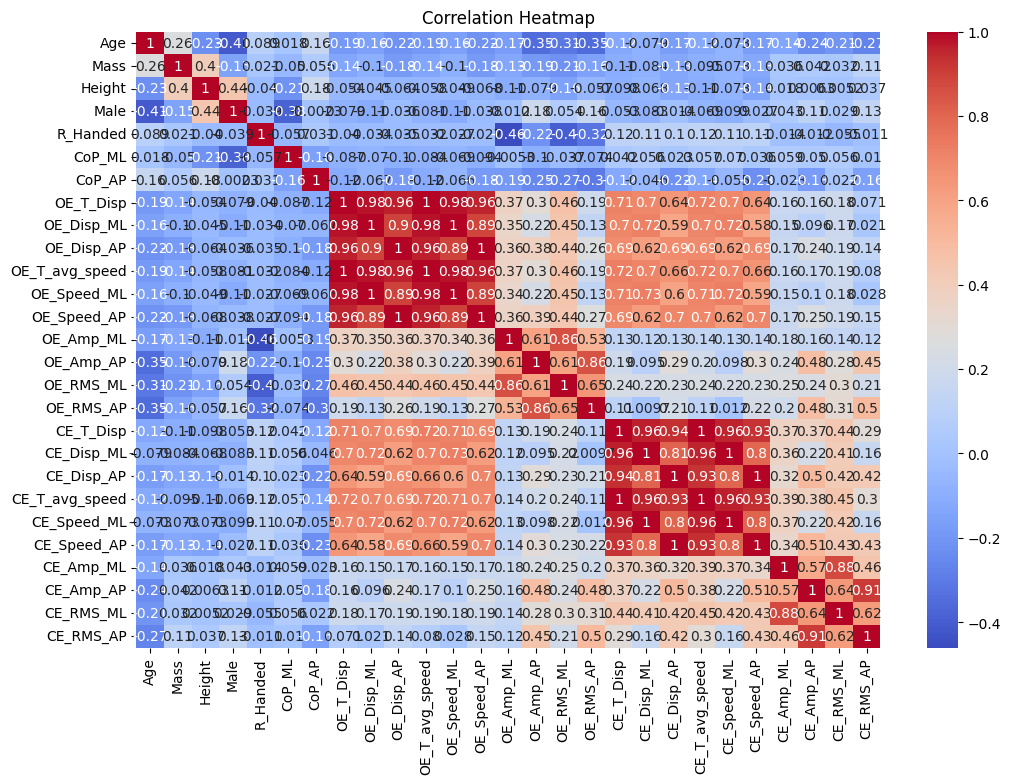

In [4]:
correlations_columns = [
    'Age', 'Mass', 'Height', 'Male', 'R_Handed', 'CoP_ML', 'CoP_AP', 'OE_T_Disp', 
    'OE_Disp_ML', 'OE_Disp_AP', 'OE_T_avg_speed', 'OE_Speed_ML', 'OE_Speed_AP', 
    'OE_Amp_ML', 'OE_Amp_AP', 'OE_RMS_ML', 'OE_RMS_AP', 'CE_T_Disp', 'CE_Disp_ML', 
    'CE_Disp_AP', 'CE_T_avg_speed', 'CE_Speed_ML', 'CE_Speed_AP', 'CE_Amp_ML', 
    'CE_Amp_AP', 'CE_RMS_ML', 'CE_RMS_AP'
]

plot_correlations(df[correlations_columns])

In [5]:
# columns to drop:
high_correlated_columns = ['OE_T_avg_speed', 'OE_Speed_ML', 'OE_Speed_AP', 'OE_Amp_ML', 
                            'OE_Amp_AP', 'OE_RMS_ML', 'OE_RMS_AP', 'CE_T_avg_speed', 'CE_Speed_ML', 
                            'CE_Speed_AP', 'CE_Amp_AP', 'CE_RMS_AP']

df = df.drop(columns=high_correlated_columns)

In [6]:
df = class_remapping(df, 'Scolio')

In [7]:
df = df.drop(columns=['Id', 'Female', 'L_Handed'])

In [8]:
df = df.rename(columns={'Male':'Sex', 'R_Handed':'Handedness', 'class':'Class'})

In [9]:
count_classes(df['Class'])

Label 0: 94 occurrences
Label 1: 55 occurrences


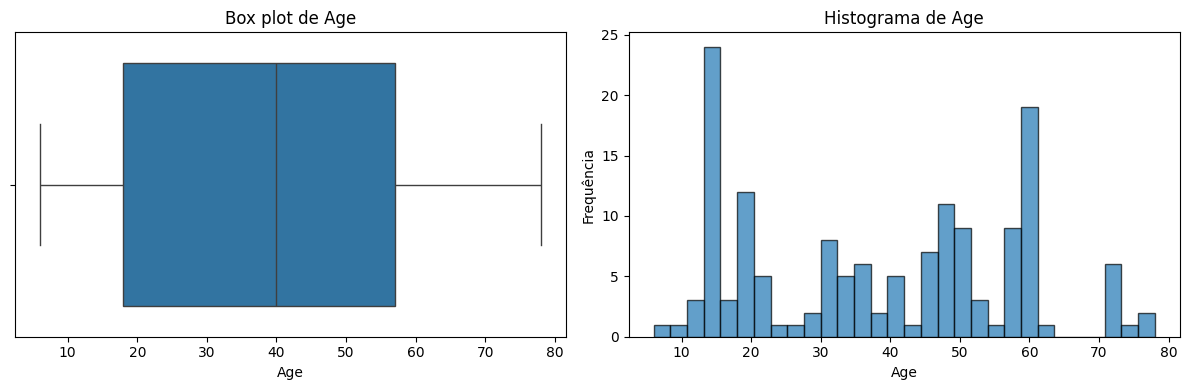

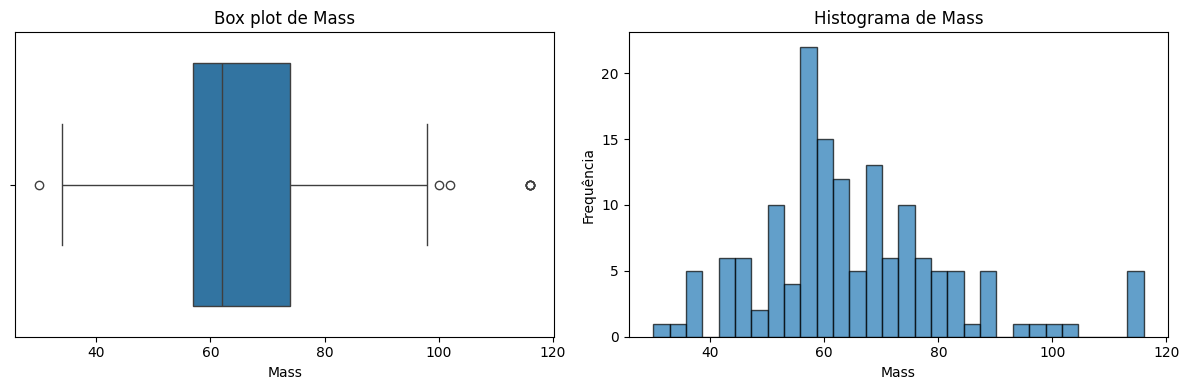

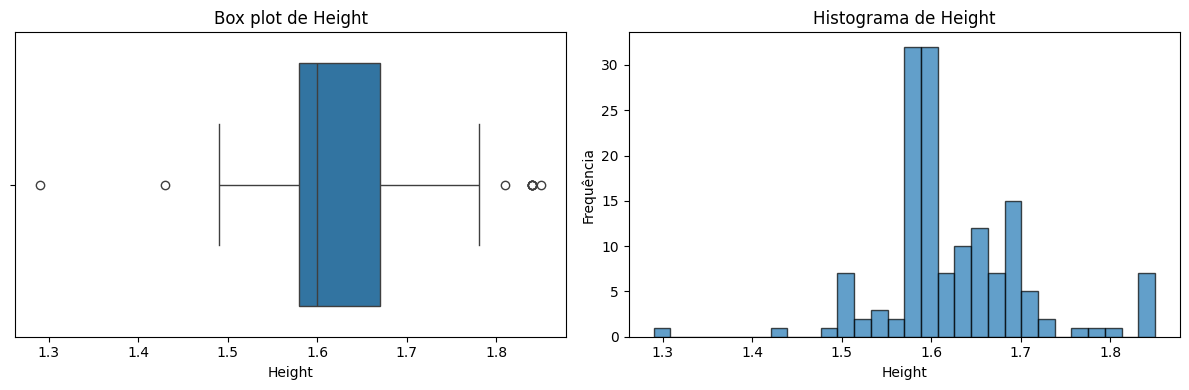

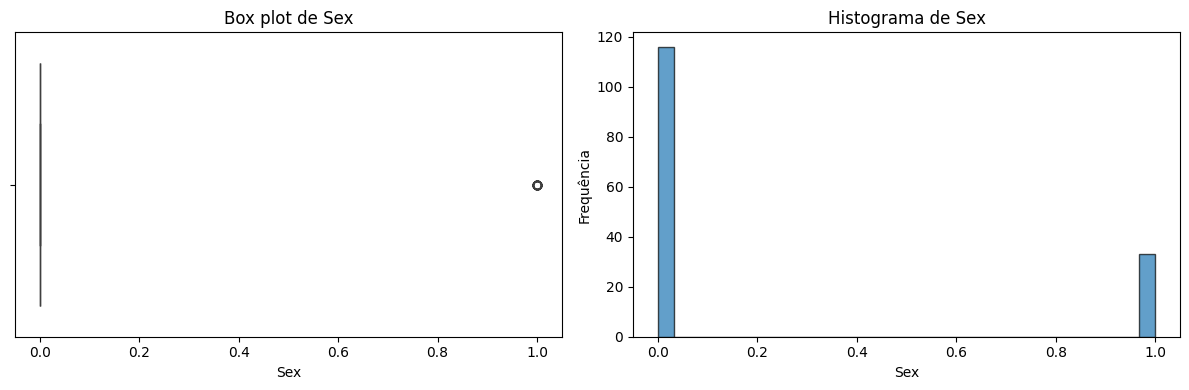

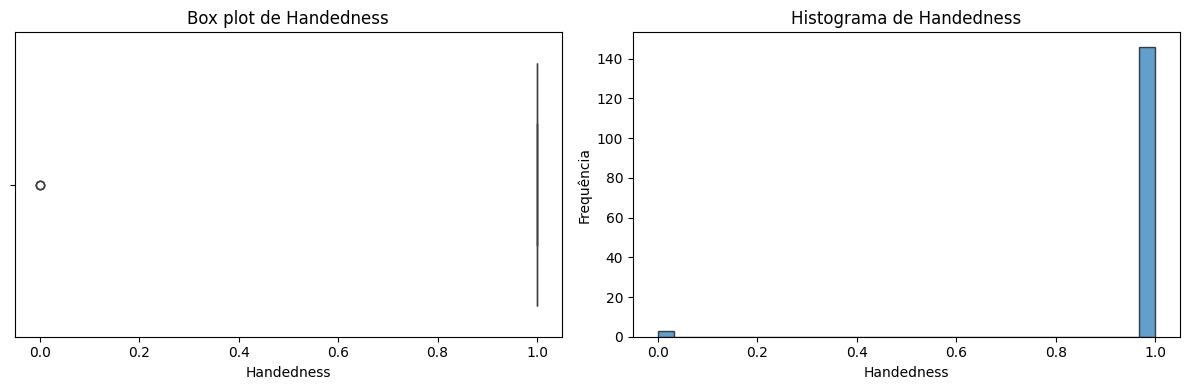

In [10]:
# Columns to explore:
columns_to_explore = ['Age','Mass','Height','Sex','Handedness']

for column in columns_to_explore:
    plot_boxplot_and_histogram(df, column)

In [11]:
df = extract_individual_n(df)

Individual number extracted successfully.


In [12]:
save_data(df, '../data/processed/processed-scoliosis-dataset.csv')

Arquivo salvo em: ../data/processed/processed-scoliosis-dataset.csv.
